In [2]:
%matplotlib inline 
import numpy as np # imports!
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.mlab as mlab
from scipy.stats import norm
from scipy import stats
import math
from datetime import datetime 
import matplotlib.dates as dates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter

### 1. Basic Line Plotting

Reproduce this image, showing river flow during flood years of the Merrimack River

![Merrimack River Discharge](merrimack_discharge.png)

The data used to create this plot can be found [un t](../data/merrimack_discharge.dat). You may read in the data any way you want. That is, you may extract the data for the years in question by hand, however part of your grade will be based on creating a flexible script that could read in values from another datafile, e.g., from another river gauge. Pay attention to detail.

   - *Undergraduates*: Focus only on the four lines representing river flow in the four specific years (1936, 1938, 1960, 1987).
   - *Graduates*: Do the undergrad work, and then add the black line representing the mean discharge (calculated from the data in the file), and the shaded region representing one standard deviation from the mean.

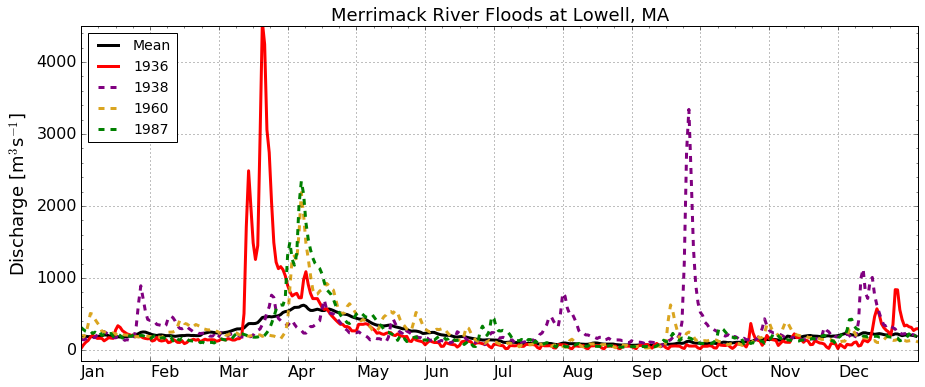

In [7]:
fig = plt.figure(figsize=(15, 6))

f= open('merrimack_discharge.dat')
f.seek(0)
line=f.readlines()

Y1936=[]
Y1938=[]
Y1960=[]
Y1987=[]
for i in line:
    data=i.split('\t')
    if not data: continue
    if len(data)<3:continue
    elif data[2].split('-')[0]=='1936':
        Y1936.append(float(data[3])*0.0283168) # Multiply in order to convert!
    elif data[2].split('-')[0]=='1938':
        Y1938.append(float(data[3])*0.0283168) # Multiply in order to convert!
    elif data[2].split('-')[0]=='1960':
        Y1960.append(float(data[3])*0.0283168) # Multiply in order to convert!
    elif data[2].split('-')[0]=='1987':
        Y1987.append(float(data[3])*0.0283168) # Multiply in order to convert!

y={}
for i in range(1923,2005):
    Y=str(i)
    y[Y]=[]
    for l in line:
        data= l.split('\t')
        if not data: continue
        if len(data)<3: continue
        elif data[2].split('-')[0]==str(i):
            y[Y].append(float(data[3])*0.0283168) # Multiply in order to convert!         
            
# Use a loop to calculate the mean!
            
mean=[]
for d in range(0,365):
    a=0
    arr=[]
    for i in range(1924,2004):
        a+=y[str(i)][d]
        arr.append(y[str(i)][d])
    mean.append(a/len(range(1924,2004)))    
      
# Plot data!

plt.plot(mean, color='black', lw=3, label='Mean')  
plt.plot(Y1936, lw=3, color='red', label='1936')
plt.plot(Y1938, lw=3, color='purple', linestyle='--', label='1938')
plt.plot(Y1960, lw=3, color='goldenrod', linestyle='--', label='1960')
plt.plot(Y1987, lw=3, color='green', linestyle='--', label='1987')
plt.ylabel('Discharge [m$^{3}$s$^{-1}$]', size=18)
plt.title('Merrimack River Floods at Lowell, MA', size=18)
plt.ylim(-150,4500,1000)
plt.xlim(0,365)
plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], size=16, ha='left')
plt.yticks(fontsize=16)
plt.legend(loc=2, fontsize=14)
plt.grid()
plt.minorticks_on()



# I spent days trying to figure out how to calculate the standard deviation. I just cannot figure it out. I look forward to seeing the solution.

### 2. Plot 2D function multiple ways

Use this code to define a set of gridded data, defined between -3 and 3 in both x and y.

    X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
    Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
       + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)

Create three different plots of Z over the X-Y plane. Use:
* `pcolor`
* `contourf`
* `contour` (with dashed lines for negative values, solid lines for positive values)

Make sure the aspect ratio is 1.

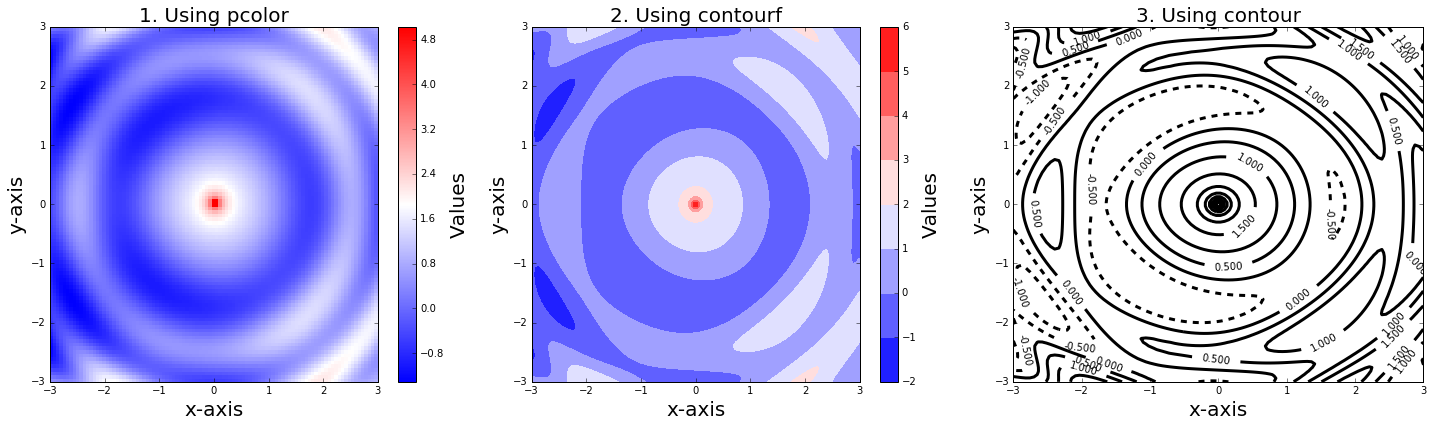

In [22]:
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100)) # I changed the numbers to -3, 3 because it says so in the question.
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
   + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)
    
fig, axes = plt.subplots(1, 3, sharey=False, figsize=(20,6)) # Set up figure size with 3 subplots.

# 1. Figure 1 (using pcolor) 
a = axes[0].pcolor(X, Y, Z, cmap='bwr') # Use the magmna colormap!
axes[0].set_title('1. Using pcolor', size=20)
axes[0].set_xlabel('x-axis', size=20)
axes[0].set_ylabel('y-axis', size=20)
cb = plt.colorbar(a, ax=axes[0]) # Not neccesary, but I wanted to add one to practice.
cb.set_label('Values', fontsize=20)
             
# 2. Figure 2 (using contourf)
b = axes[1].contourf(X, Y, Z, cmap='bwr') # Use the bwr colormap!
axes[1].set_title('2. Using contourf', size=20)
axes[1].set_xlabel('x-axis', size=20)
axes[1].set_ylabel('y-axis', size=20)
cb = plt.colorbar(b, ax=axes[1]) # Not neccesary, but I wanted to add one to practice.
cb.set_label('Values', fontsize=20)

# 3. Figure 3 (using contour) 
c = axes[2].contour(X, Y, Z,15, colors='k', linewidths=3)# Use default colors so the negative values will be dashed!
axes[2].clabel(c, inline=1)
axes[2].set_title('3. Using contour', size=20)
axes[2].set_xlabel('x-axis', size=20)
axes[2].set_ylabel('y-axis', size=20)
#cb = plt.colorbar(c, ax=axes[2]) # Not neccesary, but I wanted to add one to practice.
#cb.set_label('Values', fontsize=20)

fig.tight_layout() # Make the plot look better!

### 3. Read 2D data and make scatter plot

Temperature and salinity are known to have an important relationship in oceanography. Investigate that relationship in the CTD data from one of the files stored in `data/MCH`. Read in the data and make the following plots as subplots in one figure:

1. plot temperature vs. salinity, using black dots to mark the data points.
1. plot temperature vs. salinity, and color the markers with the depth;
1. plot temperature vs. salinity, color the markers with the depth, and then size the markers with another property of your choice from the file.

Choose a colormap that is different from the default to use for the colors of your markers for the 2nd and 3rd plots.

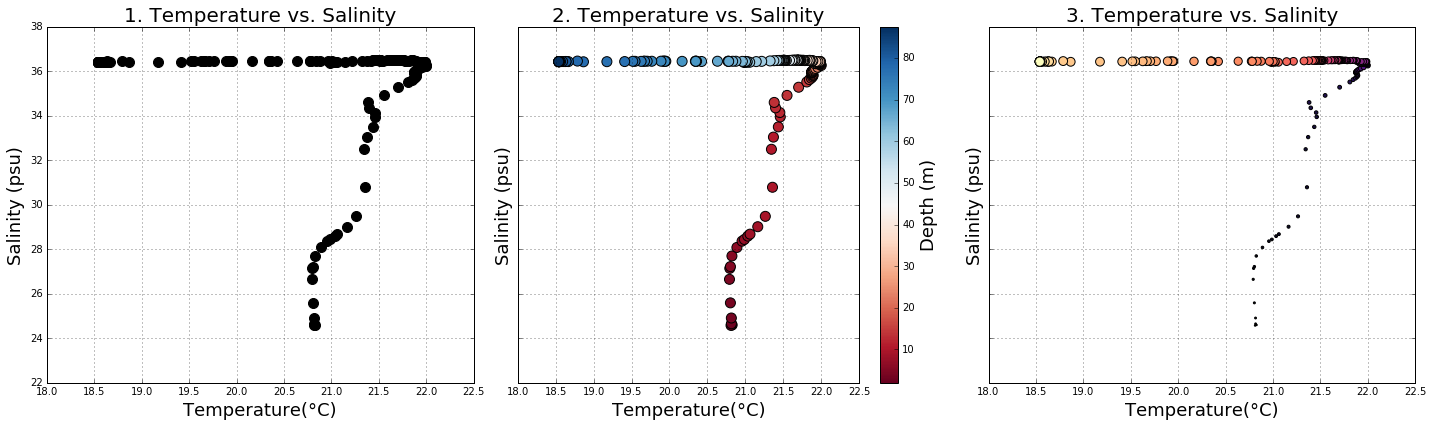

In [43]:
data = np.loadtxt('MCH/m1017a.cnv2', skiprows=57) # Read in a data file!
salinity = data[:,5] # Get the salinity data!
temp = data[:,2] # Get the temperature data!
a = depth = data[:,1] # Get the depth data!

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(20,6)) # Set up figure size with 3 subplots.


# 1. Figure 1 (termperature vs. salinity using black dots as markers).
axes[0].scatter(temp, salinity, s=100, c='black')
axes[0].set_title('1. Temperature vs. Salinity', size=20)
axes[0].set_ylabel('Salinity (psu)', size=18)
axes[0].set_xlabel('Temperature(°C)', size=18)
axes[0].grid()

# 2. Figure 2 (termperature vs. salinity coloring the markers with depth).
a = axes[1].scatter(temp, salinity, c=depth, cmap='RdBu', s=100, linewidths=1)
axes[1].set_title('2. Temperature vs. Salinity', size=20)
axes[1].set_ylabel('Salinity (psu)', size=18)
axes[1].set_xlabel('Temperature(°C)', size=18)
axes[1].grid()
cb = plt.colorbar(a, ax=axes[1])
cb.set_label('Depth (m)', fontsize=18)


# 3. Figure 3 (termperature vs. salinity coloring the markers with depth).
axes[2].scatter(temp, salinity, c=depth, cmap='magma', s=depth, linewidths=1)
axes[2].set_title('3. Temperature vs. Salinity', size=20)
axes[2].set_ylabel('Salinity (psu)', size=18)
axes[2].set_xlabel('Temperature(°C)', size=18)
axes[2].grid()

fig.tight_layout()

### 4. Histogram

Make a 1D histogram of wind speed from the BURL1 NOAA weather station. Load the data like this:

    burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
    wind_speed = burl[:, 6]

*Bonus*: What kind of probability distribution does this look like? Plot your best guess on top of the histogram using a line.

This distribution is positively skewed right!


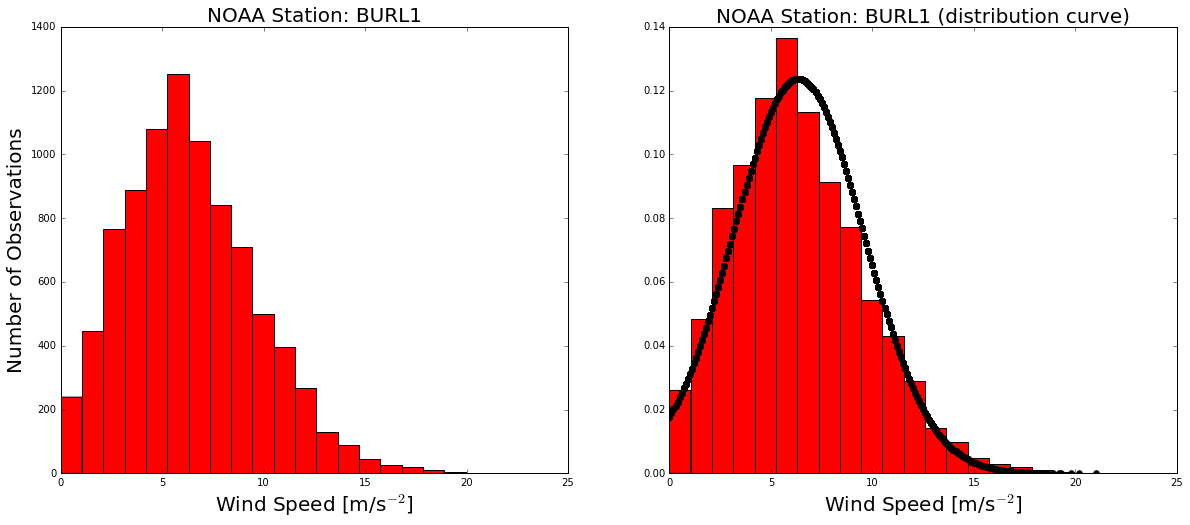

In [43]:
burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6] # Read in the data and get out the wind speed data.

fig, axes = plt.subplots(1, 2, sharey=False, figsize=(20,8))

axes[0].hist(wind_speed, bins=20, color='red')
axes[0].set_ylabel('Number of Observations', size=20)
axes[0].set_xlabel('Wind Speed [m/s$^{-2}$]', size=20)
axes[0].set_title('NOAA Station: BURL1', size=20)

axes[1].hist(wind_speed, normed=True, bins=20, color='red')
axes[1].set_xlabel('Wind Speed [m/s$^{-2}$]', size=20)
axes[1].set_title('NOAA Station: BURL1 (distribution curve)', size=20)
fit = stats.norm.pdf(wind_speed, np.mean(wind_speed),np.std(wind_speed))
axes[1].plot(wind_speed, fit,'o', color='black', lw=0.5)

print('This distribution is positively skewed right!')

### 5. (Grad) Fit and line and plot

Load in the Mauna Loa carbon dioxide dataset:

    mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
    years = mauna_loa_co2[:, 0]
    months = mauna_loa_co2[:, 1]
    co2 = mauna_loa_co2[:, 4]


Fit a 1st (straight line), 2nd, and 5th order polynomial to the data. Use your polynomial fits to predict CO$_2$ in the year 2100. Which prediction do you think is most accurate?

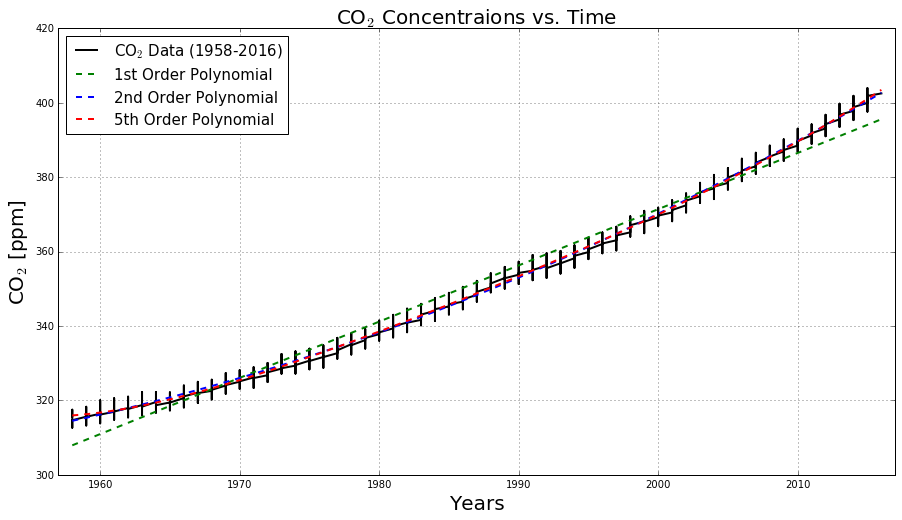

In [46]:
mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
years = mauna_loa_co2[:, 0]
months = mauna_loa_co2[:, 1]
co2 = mauna_loa_co2[:, 4]

fig = plt.figure(figsize=(15, 8))

plt.plot(years, co2, '-r', linewidth=2, label='CO$_{2}$ Data (1958-2016)', color='black')

# First order polynomial!
pol1 =np.polyfit(years, co2, 1)
y = np.linspace(1958, 2016)
first = np.polyval(pol1, y)
plt.plot(y, first, '--', linewidth=2, label='1st Order Polynomial', color='green')

# Second order polynomial!
pol2 = np.polyfit(years, co2, 2)
second = np.polyval(pol2, y)
plt.plot(y, second, '--', linewidth=2, label='2nd Order Polynomial', color='blue')

# Fifth order polynomial!
pol5 = np.polyfit(years, co2, 5)
fifth = np.polyval(pol5, y)
plt.plot(y, fifth, '--', linewidth=2, label='5th Order Polynomial', color='red')
plt.legend(loc=0, prop={'size':15})

plt.xlabel('Years', size=20)
plt.ylabel('CO$_{2}$ [ppm]', size=20)
plt.xlim(1957, 2017)
plt.title('CO$_{2}$ Concentraions vs. Time', size=20)
plt.grid()

In [48]:
# Predicted values based on the 1st, 2nd, and 5th order polynomials!


# First order polynomial preduction in 2100!
first = np.polyval(pol1, 2100)
print('The first order polynomial prediction for 2100 is ' +str(first)+ ' ppm!')

# First second polynomial prediction in 2100!
second = np.polyval(pol2, 2100)
print('The second order polynomial prediction for 2100 is ' +str(second)+ ' ppm!')

# First fifth polynomial prediction in 2100!
fifth = np.polyval(pol5, 2100)
print('The fifth order polynomial prediction for 2100 is ' +str(fifth)+ ' ppm!')

print('I think either the first or second polynomial is most accurate. The fifth seems unrealistic due to its steep decline!')

The first order polynomial prediction for 2100 is 522.531035709 ppm!
The second order polynomial prediction for 2100 is 676.004063464 ppm!
The fifth order polynomial prediction for 2100 is 142.005856037 ppm!
I think either the first or second polynomial is most accurate. The fifth seems unrealistic due to its steep decline!


### 6. (Grad) Make a movie

Make a movie of annual mean surface air temperature predictions from the AR4 model. Data are found in `data/surface_temp_predictions.npz`. Load the data using

    lon, lat, mean_surf_temp = np.load('surface_temp_predictions.npz')['arr_0']

The `['arr_0']` is needed because of the way zipped `npz` files store data; see the docstring for `np.savez`. (The source for the data can be found [here](http://nomads.ncdc.noaa.gov/thredds/dodsC/gfdlcm2x/Stable2000/tas_A1.200101-210012.nc.html)).
Make sure your movie includes some representation of the earth (like coastlines), includes a colorbar, along with other appropriate labels.

The process will be to create a loop that creates a series of frames, labeled `frame_003.png`, for example. You will want to create a string for the filename using some code like this:

    frame_name = 'frame_%03d' % frame_number

Use [ffmpeg](https://www.ffmpeg.org) to stitch the frames together to create an H264 animation that can be played by quicktime. I use a command like this:

    $ ffmpeg -y -r 10 -i frames_%04d.png -c:v libx264 -pix_fmt yuv420p -crf 15 OUTFILE.mp4

where the options mean

    -y                  Overwrite old file
    
    -r 10               Play 10 frames per second
    
    -c:v libx264        Use the H264 library
    
    -crf 15             Use a compression factor of 15 (0=lossless, 51=poor.)
                        Quicktime cannot play lossless encoded movies. 15 appears to be reasonable.

    -pix_fmt yuv420p    Special command so that quicktime can play the movie.  Note, this requires
                        an even number of pixels.  If you don't have this, you can use convert to 
                        crop a pixel off edge of the image.

See [this page]https://trac.ffmpeg.org/wiki/x264EncodingGuide for more information.    

In [22]:
#lon, lat, mean_surf_temp = np.load('surface_temp_predictions.npz', encoding='latin1')['arr_0']

# Loop to create each image! I commented it out so it would not create all 100 images again!
# The images and animation are located in my git repository.

#for i in range(0,100): 
    
#     fig = plt.figure(figsize=(15, 12))
#     m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360, resolution='c')
#     m.drawcoastlines(color='black', linewidth=1)
#     m.fillcontinents(color='grey', alpha=0.4)
#     m.drawcountries()
#     m.drawmeridians(np.arange(0,360,40),labels=[True, True, False, True], size=14)
#     m.drawparallels(np.arange(-90,90,40),labels=[True, False, True, False], size=14)
#     plt.title('Mean Surface Air Temperature Prediction (AR4 Model) ' + str(i), size=24)
    
#     x, y = (np.meshgrid(lon, lat))
#     ba = plt.pcolormesh(x, y, mean_surf_temp[i], cmap='rainbow')
#     cb = plt.colorbar(ba, orientation='horizontal', pad=0.08)
#     cb.set_label('Kelvin', fontsize=20)
#     font_size = 14 
#     cb.ax.tick_params(labelsize=font_size)
#     fig.savefig('Mean_Surface_Temperature_%02d.png' % i)